In [169]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [170]:
#Importing data
data = pd.read_csv('stock_AAPL.csv')
data

,date_txn,symbol,open,high,low,close,volume,macd,mfi,rsi,william_r,stochastic_fast,stochastic_slow,bollinger_bands,chaikin_money_flow,obv,log_timestamp,datasource
0,2016-06-28,AAPL,92.90,93.66,92.14,93.59,40444914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
1,2016-06-29,AAPL,93.97,94.55,93.63,94.40,36531006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
2,2016-06-30,AAPL,94.44,95.77,94.30,95.60,35836356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
3,2016-07-01,AAPL,95.49,96.46,95.33,95.89,26026540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
4,2016-07-05,AAPL,95.39,95.40,94.46,94.99,27705210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
5,2016-07-06,AAPL,94.60,95.66,94.37,95.53,30949090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
6,2016-07-07,AAPL,95.70,96.50,95.62,95.94,25139558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
7,2016-07-08,AAPL,96.49,96.89,96.05,96.68,28912103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
8,2016-07-11,AAPL,96.75,97.65,96.73,96.98,23794945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN
9,2016-07-12,AAPL,97.17,97.70,97.12,97.42,24167463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-12-28 06:09:09.664752,NaN


In [171]:
#Removing unnecessary columns
data = data.drop(['symbol','macd','mfi','rsi','william_r','stochastic_fast','stochastic_slow','bollinger_bands','chaikin_money_flow','obv','log_timestamp','datasource'], axis=1)
data

,date_txn,open,high,low,close,volume
0,2016-06-28,92.90,93.66,92.14,93.59,40444914
1,2016-06-29,93.97,94.55,93.63,94.40,36531006
2,2016-06-30,94.44,95.77,94.30,95.60,35836356
3,2016-07-01,95.49,96.46,95.33,95.89,26026540
4,2016-07-05,95.39,95.40,94.46,94.99,27705210
5,2016-07-06,94.60,95.66,94.37,95.53,30949090
6,2016-07-07,95.70,96.50,95.62,95.94,25139558
7,2016-07-08,96.49,96.89,96.05,96.68,28912103
8,2016-07-11,96.75,97.65,96.73,96.98,23794945
9,2016-07-12,97.17,97.70,97.12,97.42,24167463


In [172]:
#Statistical summary of data
data.describe()

,open,high,low,close,volume
count,403.000000,403.000000,403.000000,403.000000,4.030000e+02
mean,138.379504,139.315261,137.496452,138.493945,2.936934e+07
std,24.205132,24.293410,23.970691,24.121304,1.286572e+07
min,92.900000,93.660000,92.140000,93.590000,1.147592e+07
25%,114.330000,115.715000,113.500000,114.550000,2.143903e+07
50%,143.500000,144.160000,142.510000,143.640000,2.615330e+07
75%,157.145000,158.130000,156.115000,157.065000,3.337260e+07
max,179.370000,180.100000,178.250000,179.260000,1.123403e+08


# Data Visualization

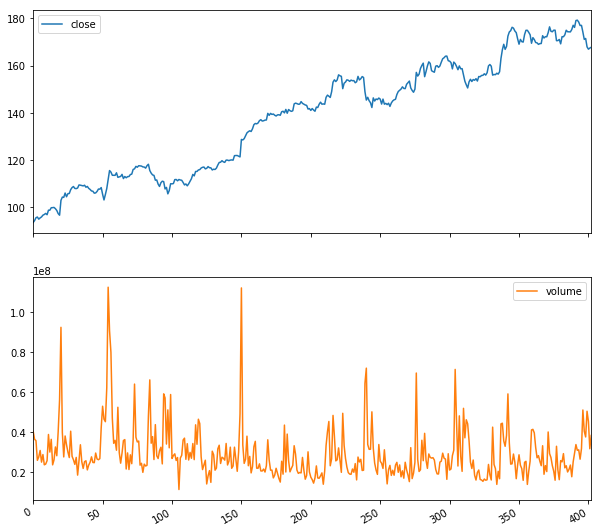

In [173]:
# Plotting the historical closing price and volume using matplotlib
plots = data[['close', 'volume']].plot(subplots=True, figsize=(10, 10))
plt.show()

/home/shikhar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()
  
/home/shikhar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=200).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


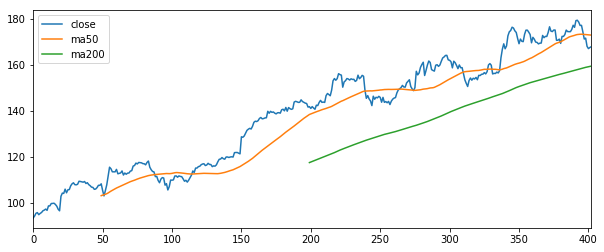

In [174]:
# Charting a basic 50 and 200 period moving average of the closing price
data['ma50'] = pd.rolling_mean(data['close'], 50)
data['ma200'] = pd.rolling_mean(data['close'], 200)
plots = data[['close', 'ma50', 'ma200']].plot(subplots=False, figsize=(10, 4))
plt.show()

# Prediction model

In [175]:
#Creating testing and training dataset
price = data['close']
price = price.values
price = price.astype('float32')
price = price.reshape(403, 1)
price
scaler = MinMaxScaler(feature_range=(0, 1)) 
price = scaler.fit_transform(price) #Normalizing the dataset
train_size = int(len(price) * 0.80)
test_size = len(price) - train_size
train, test = price[0:train_size,:], price[train_size:len(price),:]
print(len(train), len(test))

322 81


In [176]:
# Converting an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [177]:
# Reshaping into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [178]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [179]:
#Building Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

/home/shikhar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/home/shikhar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(None, 1), return_sequences=True, units=50)`
  import sys


compilation time :  0.09006309509277344


/home/shikhar/.local/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  app.launch_new_instance()


/usr/local/lib/python3.5/dist-packages/keras/models.py:944: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 304 samples, validate on 16 samples
Epoch 1/120
304/304 [==============================] - 11s 35ms/step - loss: 3.2937 - acc: 0.0000e+00 - val_loss: 2.7666 - val_acc: 0.0000e+00
Epoch 2/120
304/304 [==============================] - 0s 1ms/step - loss: 1.5892 - acc: 0.0000e+00 - val_loss: 2.3989 - val_acc: 0.0000e+00
Epoch 3/120
304/304 [==============================] - 0s 1ms/step - loss: 1.4242 - acc: 0.0000e+00 - val_loss: 2.2039 - val_acc: 0.0000e+00
Epoch 4/120
304/304 [==============================] - 0s 1ms/step - loss: 1.3224 - acc: 0.0000e+00 - val_loss: 2.0749 - val_acc: 0.0000e+00
Epoch 5/120
304/304 [==============================] - 0s 1ms/step - loss: 1.2584 - acc: 0.0000e+00 - val_loss: 1.9803 - val_acc: 0.0000e+00
Epoch 6/120
304/304 [==============================] - 0s 1ms/step - loss: 1.2117 - acc: 0.0000e+00 - val_loss: 1.9038 - val_acc: 0.0000e+00
Epoch 7/120
304/304 [==============================] - 0s 1ms/step - loss: 1.1689 - acc: 0.0000e+00 - val_l

304/304 [==============================] - 0s 909us/step - loss: 0.5959 - acc: 0.0000e+00 - val_loss: 0.6183 - val_acc: 0.0000e+00
Epoch 59/120
304/304 [==============================] - 0s 1ms/step - loss: 0.5951 - acc: 0.0000e+00 - val_loss: 0.6196 - val_acc: 0.0000e+00
Epoch 60/120
304/304 [==============================] - 0s 1ms/step - loss: 0.5929 - acc: 0.0000e+00 - val_loss: 0.6203 - val_acc: 0.0000e+00
Epoch 61/120
304/304 [==============================] - 0s 967us/step - loss: 0.5939 - acc: 0.0000e+00 - val_loss: 0.6202 - val_acc: 0.0000e+00
Epoch 62/120
304/304 [==============================] - 0s 968us/step - loss: 0.5914 - acc: 0.0000e+00 - val_loss: 0.6196 - val_acc: 0.0000e+00
Epoch 63/120
304/304 [==============================] - 0s 1ms/step - loss: 0.5932 - acc: 0.0000e+00 - val_loss: 0.6195 - val_acc: 0.0000e+00
Epoch 64/120
304/304 [==============================] - 0s 949us/step - loss: 0.5974 - acc: 0.0000e+00 - val_loss: 0.6193 - val_acc: 0.0000e+00
Epoch 65/12

304/304 [==============================] - 0s 1ms/step - loss: 0.5727 - acc: 0.0000e+00 - val_loss: 0.5941 - val_acc: 0.0000e+00
Epoch 116/120
304/304 [==============================] - 0s 1ms/step - loss: 0.5737 - acc: 0.0000e+00 - val_loss: 0.5937 - val_acc: 0.0000e+00
Epoch 117/120
304/304 [==============================] - 0s 1ms/step - loss: 0.5741 - acc: 0.0000e+00 - val_loss: 0.5940 - val_acc: 0.0000e+00
Epoch 118/120
304/304 [==============================] - 0s 1ms/step - loss: 0.5831 - acc: 0.0000e+00 - val_loss: 0.5945 - val_acc: 0.0000e+00
Epoch 119/120
304/304 [==============================] - 0s 1ms/step - loss: 0.5717 - acc: 0.0000e+00 - val_loss: 0.5949 - val_acc: 0.0000e+00
Epoch 120/120
304/304 [==============================] - 0s 1ms/step - loss: 0.5732 - acc: 0.0000e+00 - val_loss: 0.5949 - val_acc: 0.0000e+00


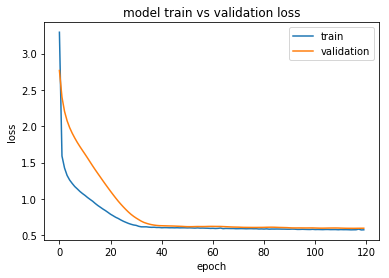

In [180]:
#Plot to compare model fit
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(trainX, trainY, batch_size=100, nb_epoch=120, validation_split=0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [181]:
# Makeing predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# Inverting predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# Calculating root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 4.10 RMSE
Test Score: 3.45 RMSE


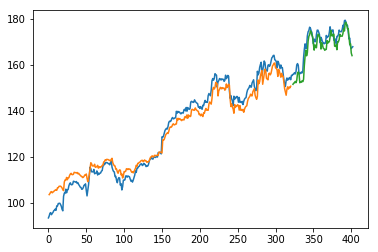

In [182]:
# Shifting train predictions for plotting
trainPredictPlot = np.empty_like(price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# Shifting test predictions for plotting
testPredictPlot = np.empty_like(price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(price)-1, :] = testPredict
# Plotting baseline and predictions
plt.plot(scaler.inverse_transform(price))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()